<a href="https://colab.research.google.com/github/timsetsfire/wandb-examples/blob/main/colab/custom_charts_with_wandb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## adding a custom chart to w&b

Starting out with a confusion matrix,  we will use W&B custom charting capabilities to plot confusion matrices in app.  

The whole thing starts off witha vega spec 

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"name": "wandb"},
  "title": "${string:Title}",
  "encoding": {
    "y": {"field": "${field:Actuals}", "type": "ordinal"},
    "x": {"field": "${field:Predictions}", "type": "ordinal"}
  },
  "layer": [
    {
      "mark": "rect",
      "encoding": {
        "color": {
          "field": "${field:Value}",
          "type": "quantitative",
          "title": "Scale",
          "legend": {"direction": "vertical", "gradientLength": 120},
          "scale": {"scheme": "blues"}
        }
      }
    },
    {
      "mark": "text",
      "encoding": {
        "text": {"field": "${field:Value}", "type": "quantitative"},
        "color": {
          "condition": {"test": "datum.${field:Value} <  datum['${field:Average Value}']", "value": "black"},
          "value": "white"
        }
      }
    }
  ],
  "config": {
    "axis": {"grid": true, "tickBand": "extent"}
  }
}
```
The "fields" of this vega spec are 
* `Title` - Title of you confusion matrix
* `Actuals` - Column containing ground truth
* `Predictions` - Column containing predictions
* `Value` - the value that needs to be within the cell of the confusion matrix
* `Average Value` - The average of the value column - this is use to color text white or black.  

All of these fields will be passed through via chart creation a little later (see example below)

Go into W&B (any project really) and click __Add Panel__, then __Custom Chart__
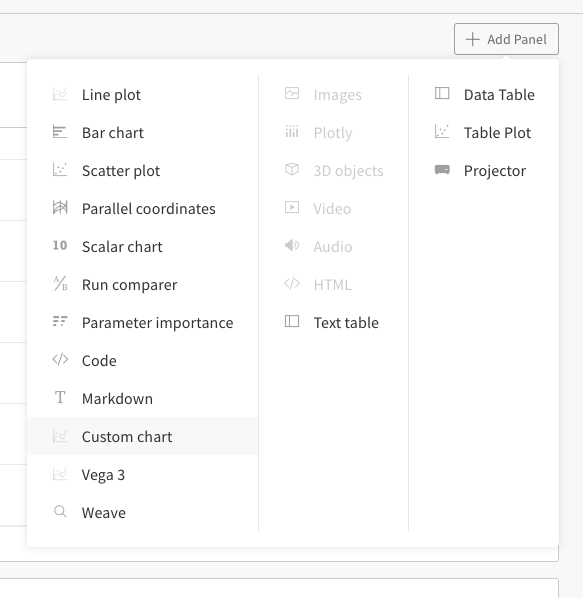

Once you have click custom chart, click the __Edit__ button 
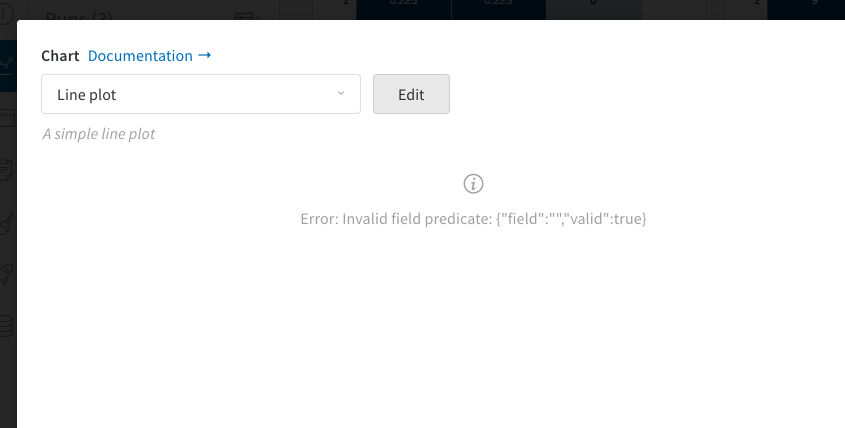

Paste in the vega spec from above and __Save as new preset__ 
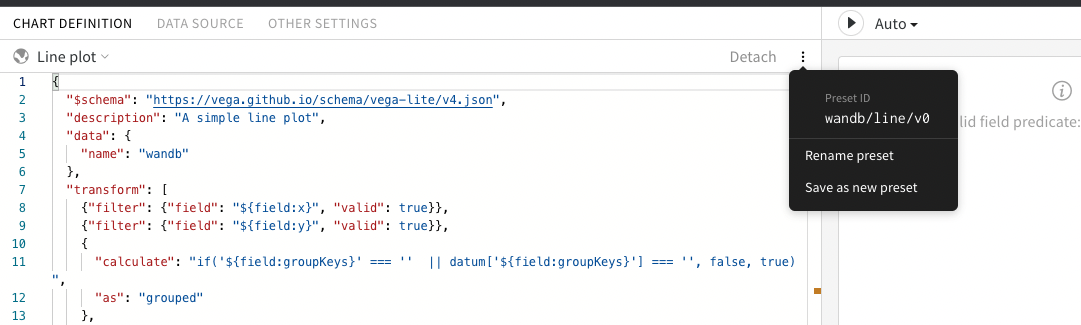

Enter a name 
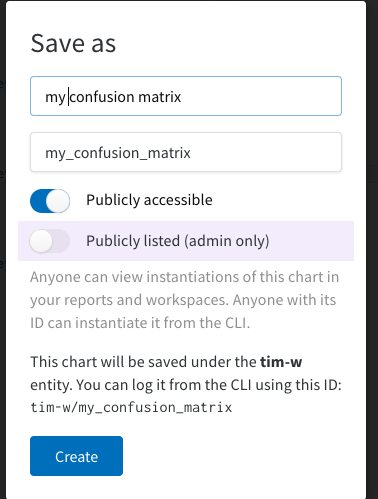

and save

Once that is complete, now you can create the plot from your code.  Please see the example below.  

In [1]:
%%capture
!pip install wandb -qqq
import numpy as np
import pandas as pd
import wandb

In [3]:
## Generate some dummy data

data = []
for i in ["a", "b", "c"]:
  for j in ["a", "b", "c"]:
    data.append((i,j,np.random.randint(0,10)))

df = pd.DataFrame(data, columns = ["Actual", "Prediction", "Count"])
N = df["Count"].sum()
df["p"] = df["Count"] / N
df["Average Count"] = np.ceil(df["Count"].mean())
df["p"] = np.round(df["p"], 3)
df["Average"] = df["p"].mean()
print(df)

  Actual Prediction  Count      p  Average Count   Average
0      a          a      1  0.026            5.0  0.111222
1      a          b      7  0.179            5.0  0.111222
2      a          c      0  0.000            5.0  0.111222
3      b          a      6  0.154            5.0  0.111222
4      b          b      4  0.103            5.0  0.111222
5      b          c      3  0.077            5.0  0.111222
6      c          a      4  0.103            5.0  0.111222
7      c          b      6  0.154            5.0  0.111222
8      c          c      8  0.205            5.0  0.111222


In [4]:

with wandb.init(project = "confusion_matrix") as run:

  ## below, the vega_spec_name argement of plot_table is where we pass through the name of the preset specified earlier

  ## Normalized Confusion Matrix
  fields = {"Actuals": "Actual", "Predictions": "Prediction", "Value": "p", "Average Value": "Average"}
  string_fields = { "Title": "Normalized Confusion Matrix"}
  my_custom_chart = wandb.plot_table(vega_spec_name="tim-w/my_confusion_matrix",
              data_table=wandb.Table(dataframe = df),
              fields=fields, string_fields = string_fields
              )

  ## raw confusion matrix
  fields = {"Actuals": "Actual", "Predictions": "Prediction", "Value": "Count", "Average Value": "Average Count"}
  string_fields = { "Title": "Raw Confusion Matrix"}
  my_custom_chart2 = wandb.plot_table(vega_spec_name="tim-w/my_confusion_matrix",
              data_table=wandb.Table(dataframe = df),
              fields=fields, string_fields = string_fields
              )
  
  ## Log charts
  wandb.log({"Normalized Confusion Matrix": my_custom_chart, "Raw Confusion Matrix": my_custom_chart2})




ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
